# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## 1. Is the distribution Normal ?

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

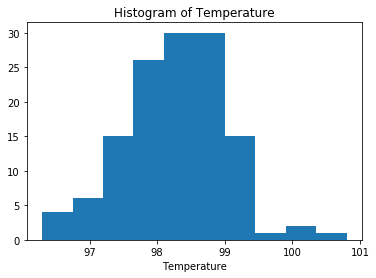

((array([-2.55445479, -2.22902648, -2.0419783 , -1.90719589, -1.80015121,
         -1.71047373, -1.63275826, -1.56381343, -1.50159038, -1.44469181,
         -1.39212017, -1.3431372 , -1.29718048, -1.2538112 , -1.21268003,
         -1.17350409, -1.13605091, -1.10012698, -1.06556939, -1.03223961,
         -1.00001877, -0.96880405, -0.93850586, -0.90904562, -0.88035396,
         -0.85236935, -0.82503685, -0.79830725, -0.77213622, -0.74648367,
         -0.72131321, -0.69659166, -0.67228871, -0.64837651, -0.62482945,
         -0.60162387, -0.57873784, -0.55615102, -0.53384444, -0.51180041,
         -0.49000234, -0.46843466, -0.44708273, -0.42593273, -0.40497157,
         -0.38418687, -0.36356684, -0.34310027, -0.32277642, -0.30258504,
         -0.28251629, -0.2625607 , -0.24270913, -0.22295275, -0.20328303,
         -0.18369165, -0.16417053, -0.14471177, -0.12530767, -0.10595063,
         -0.08663321, -0.06734807, -0.04808795, -0.02884566, -0.00961403,
          0.00961403,  0.02884566,  0.

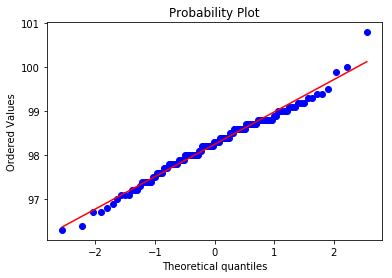

In [115]:
# Plotting histogram to check for normality, visually

plt.hist(df['temperature'])
plt.xlabel('Temperature')
plt.title('Histogram of Temperature')

plt.show()

import scipy.stats as stats

# Plotting qq plot

stats.probplot(df['temperature'],dist='norm',plot=plt)

##### Note : The histogram of temperature does not clearly indicate normality. The probability plot (qqplot) does suggest that temperature follows nromal distribution but not perfectly. 

In [116]:
#Performing a normality test ( D Agostino Method )

from scipy.stats import normaltest
normaltest(df['temperature'],nan_policy='omit')

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

##### Note : Normality test (k^2 + s^2) has a 0.258 p value, indicating that the null hypothesis is true. The test indicates the temperature data is normally distributed

## 2. Is the sample size large? Are the observations independent? - CLT Applicability 

In [117]:
print(" Sample size is {}".format(len(df['temperature'])))

 Sample size is 130


##### Note : The sample of 130 is sufficiently large ( n >30 ). Since every measurement/ observation comes from different individual, the sampled are independent. 

## 3. Test of Hypothesis : Is the true population mean 98.6 F

#### Ho : True mean temperature is 98.6
#### Ha : Mean temperature is not 98.6

### 3.1 Bootstrap Method

In [118]:
import numpy as np

print('Mean temperature :{}'.format(df['temperature'].mean()))

print('Standard Deviation of temperature :{}'.format(df['temperature'].std()))

# function to evaluate cdf empirically
def ecdf(data):
    
    x = np.sort(data)
    y= np.arange(1,len(x)+1)/len(x)
    
    return x,y


Mean temperature :98.24923076923078
Standard Deviation of temperature :0.7331831580389454


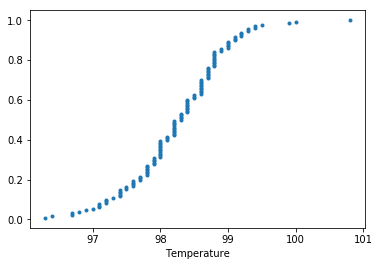

In [142]:
# Plotting ecdf of samples

x,y = ecdf(df['temperature'])

plt.plot(x,y,marker='.',linestyle='none')

plt.xlabel('Temperature')

plt.show()

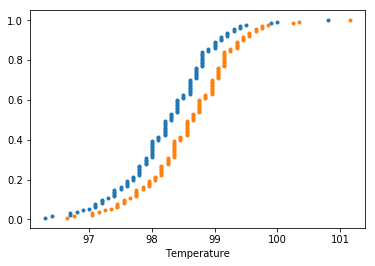

In [143]:
# trasnform data such that mean is 98.6

temp_trans = df['temperature']- np.mean(df['temperature']) + 98.6

x_tran, y_tran = ecdf(temp_trans)

# plotting the actual sample ecdf and shifted sample ecdf

plt.plot(x,y,marker='.',linestyle='none')

plt.plot(x_tran,y_tran,marker='.',linestyle='none',)

plt.xlabel('Temperature')

plt.show()

In [121]:
# Test statistic of choice

def diff_from_true_mean(data,avg=98.6):
    return np.mean(data)-98.6

In [122]:
# function to return bootstrap replicate 

def bootstrap_replicates(data,func):
    
    return func(np.random.choice(data,len(data)))

In [123]:
# function to create multiple bootstrap replicates

def draw_bs_replicate(data,func,size=1):
    
    bs_replicates = np.empty(size)
    
    for i in range(size):
        
        bs_replicates[i] = bootstrap_replicates(data,func)
        
    return bs_replicates
    

In [124]:
diff_observed = diff_from_true_mean(df['temperature'])

bs_replicates = draw_bs_replicate(temp_trans,diff_from_true_mean,10000)

p = np.sum(bs_replicates<=diff_observed)/len(bs_replicates)

p

0.0

##### Note : The p value from the bootstrap approach rejects the null hypothesis

### 3.2 Frequentist Approach

##### Note : Since we are comparing sample mean and a known mean value, we can use one sample test. Since we do not have any idea about the standard deviation of the population, t - test is recommended.  

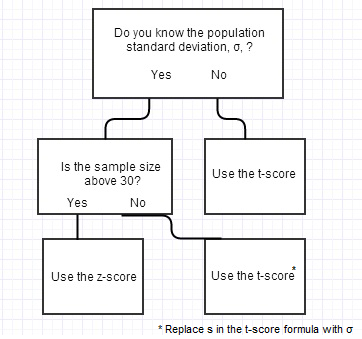

Source : http://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/


In [125]:
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_1samp



In [126]:
# z test 

ztest(df['temperature'],value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

Let's use t test on the same sample.

In [127]:
# t test 

ttest_1samp(df['temperature'],98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The t test results indicate a higher p value than the z test but ,practically, both the values are really small. 

##### Note: The p values of the z-test and the t-test also clearly reject the null hypothesis. Therefore, mean temperature is not 98.6

## 4. Frequentist tests on small sample of size 10 from the data 

##### Note : Again, in absence of population SD and ,additionally, knowing the sample size is less than 30, t - test should yield better results

In [128]:
small_sample = np.random.choice(df['temperature'],10)

In [129]:
# t test

ttest_1samp(small_sample,98.6)

Ttest_1sampResult(statistic=-1.5673564207442905, pvalue=0.1514747404491765)

In [130]:
# z test

ztest(small_sample,value=98.6)

(-1.5673564207442905, 0.11703140425593107)

## 5.  What is considered " Abnormal Temperature"

In [131]:
# 95% confidence interval

m = df['temperature'].mean()
sig = df['temperature'].std()
n = len(df['temperature'])

temp_95_con = [m - 1.96*(sig/(n**0.5)),m + 1.96*(sig/(n**0.5)) ]
temp_99_con = [m - 2.576*(sig/(n**0.5)),m + 2.576*(sig/(n**0.5)) ]

print(" Temperature interval with 95% confidence {} :".format(temp_95_con))
print(" Temperature interval with 99% confidence {} :".format(temp_99_con))


 Temperature interval with 95% confidence [98.12319411222852, 98.37526742623304] :
 Temperature interval with 99% confidence [98.08358259145638, 98.41487894700518] :


##### Note : We are 95% confident that if someone's body temperature is lower than 98.122 F or higher than 98.376 F, then this person's temperature is abnormal.

## 6. Significant difference in normal temperature for the two genders ?



In [134]:
temp_m = df['temperature'][df.gender=='M']
temp_f = df['temperature'][df.gender=='F']


##### Note : Use t test for independent samples to test for signficance 

In [135]:
from scipy.stats import ttest_ind

ttest_ind(temp_m,temp_f)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

##### Note : Looking at the p value of t-test, the null hypothesis that these two independent samples have identical avergaes is not true and therefore it has to be rejected. By extension, the two genders have a different normal temperature

## Conclusion

1. The average temperature of human body is not 98.6 deg F as proven by this study.
2. The average body temperature for both the genders is not the same. 
 